In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle

plt.style.use('dark_background')

%matplotlib inline

In [2]:
data = np.load('/home/danielk/git/antisat_analysis/projects/output/russian_asat/2021.11.23_uhf_rcs/discos_object_sizes.npz')

In [3]:
for key in data:
    x = data[key]
    print(f'{key} = {np.sum(np.isnan(x))}/{len(x)} number of nans')

measurnment_id = 0/30 number of nans
oid = 0/30 number of nans
min_area = 7/30 number of nans
avg_area = 7/30 number of nans
max_area = 7/30 number of nans
diam = 24/30 number of nans


(array([4., 0., 3., 0., 0., 2., 0., 5., 4., 5.]),
 array([-1.80761295, -1.51094528, -1.21427761, -0.91760993, -0.62094226,
        -0.32427458, -0.02760691,  0.26906076,  0.56572844,  0.86239611,
         1.15906378]),
 <BarContainer object of 10 artists>)

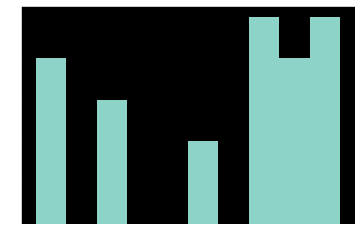

In [4]:
plt.hist(np.log10(data['avg_area']))

In [5]:
for oid, A, minA, maxA, d in zip(data['oid'], data['avg_area'], data['min_area'], data['max_area'], data['diam']):
    print(f'OID-{int(oid)}: avg. A = {A} [{minA},{maxA}], d={d}')

OID-46275: avg. A = 0.625 [0.25,0.75], d=nan
OID-43013: avg. A = 8.4344 [1.96,14.5605065764063], d=nan
OID-43656: avg. A = nan [nan,nan], d=nan
OID-46396: avg. A = 9.2307 [4.0,16.5284], d=nan
OID-42805: avg. A = 14.4232716911764 [1.8988,21.3256], d=1.5
OID-43193: avg. A = 0.0254160184615763 [0.02,0.0314159265358979], d=0.2
OID-43255: avg. A = 14.4232716911764 [1.8988,21.3256], d=1.5
OID-46465: avg. A = nan [nan,nan], d=nan
OID-46480: avg. A = nan [nan,nan], d=nan
OID-48042: avg. A = 2.88533333333333 [1.0,5.2931349405062], d=nan
OID-48047: avg. A = 2.88533333333333 [1.0,5.2931349405062], d=nan
OID-43348: avg. A = nan [nan,nan], d=nan
OID-44890: avg. A = nan [nan,nan], d=nan
OID-49301: avg. A = 2.88533333333333 [1.0,5.2931349405062], d=nan
OID-43097: avg. A = 0.0254 [0.02,0.0314], d=nan
OID-43476: avg. A = 5.60268585219263 [1.70431401457246,10.0881068590692], d=nan
OID-43477: avg. A = 5.60268585219263 [1.70431401457246,10.0881068590692], d=nan
OID-46320: avg. A = 0.08 [0.04,0.09380831519

<ErrorbarContainer object of 3 artists>

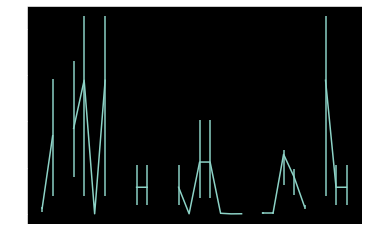

In [6]:
plt.errorbar(
    np.arange(len(data['oid'])),
    data['avg_area'],
    np.vstack([
        data['avg_area'] - data['min_area'],
        data['max_area'] - data['avg_area'],
    ]),
)

In [7]:
file = '/home/danielk/git/antisat_analysis/projects/output/russian_asat/2021.11.23_uhf_rcs/uhf_20211123_124927_000000/uhf_20211123_124927_000000_results.pickle'
with open(file, 'rb') as fh:
    res = pickle.load(fh)

(array([3603., 1034.,  827.,  690.,  662.,  744.,  953.,  753.,  432.,
         302.]),
 array([0.        , 0.09875692, 0.19751384, 0.29627076, 0.39502768,
        0.49378459, 0.59254151, 0.69129843, 0.79005535, 0.88881227,
        0.98756919]),
 <BarContainer object of 10 artists>)

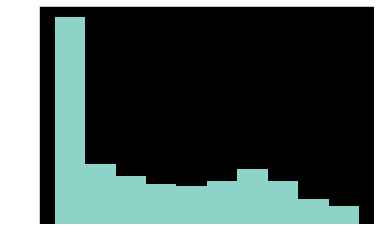

In [8]:
plt.hist(res['best_matches'])

(array([31., 42., 41., 35., 26., 21., 12.,  8., 15., 32.]),
 array([0.90009034, 0.90883822, 0.91758611, 0.92633399, 0.93508188,
        0.94382976, 0.95257765, 0.96132553, 0.97007342, 0.9788213 ,
        0.98756919]),
 <BarContainer object of 10 artists>)

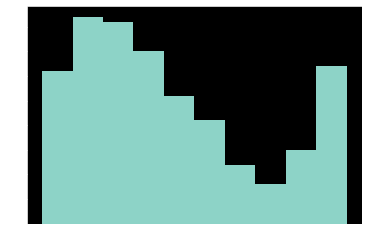

In [9]:
plt.hist(res['best_matches'][res['best_matches'] > 0.9])

(array([ 5.,  4.,  6.,  2.,  4., 10.,  4.,  6.,  8., 21.]),
 array([0.95008746, 0.95383563, 0.95758381, 0.96133198, 0.96508015,
        0.96882832, 0.9725765 , 0.97632467, 0.98007284, 0.98382102,
        0.98756919]),
 <BarContainer object of 10 artists>)

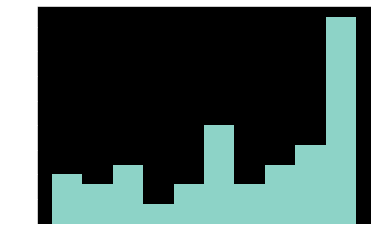

In [10]:
plt.hist(res['best_matches'][res['best_matches'] > 0.95])

0.9798701768236135


(0.8, 1.0)

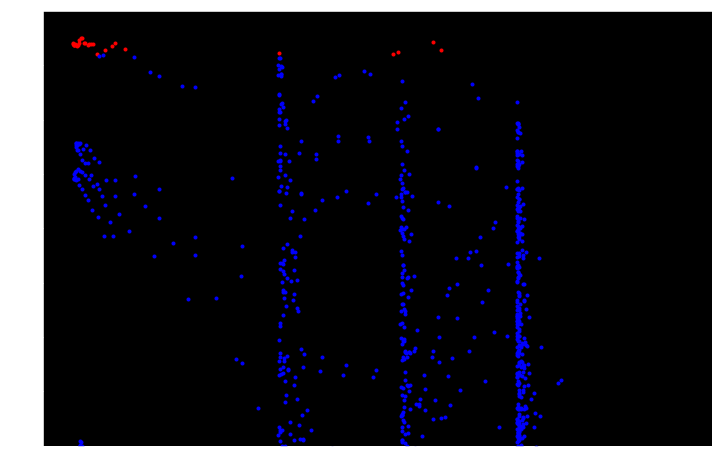

In [46]:
match_limit = np.percentile(res['best_matches'], 100 - 0.3)
print(match_limit)
inds = res['best_matches'] > match_limit
not_inds = np.logical_not(inds)
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.log10(res['best_diams'][inds]), res['best_matches'][inds], '.r')
ax.plot(np.log10(res['best_diams'][not_inds]), res['best_matches'][not_inds], '.b')
ax.set_ylim([0.8,1])

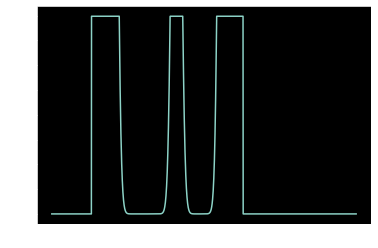

In [69]:
from scipy.stats import norm
x = np.linspace(-2, 2, 2000)
y = np.zeros_like(x)
for j in np.argwhere(inds).flatten():
    y += norm.pdf(x, loc=np.log10(res['best_diams'][j]), scale=0.05)
y_ = norm.pdf(x, loc=0, scale=0.1)
y[y > y_.max()*0.5] = y_.max()*0.5
y[x < np.min(np.log10(res['best_diams'][inds]))] = 0
y[x > np.max(np.log10(res['best_diams'][inds]))] = 0
plt.plot(x, y/(y_.max()*0.5))

(0.8, 1.0)

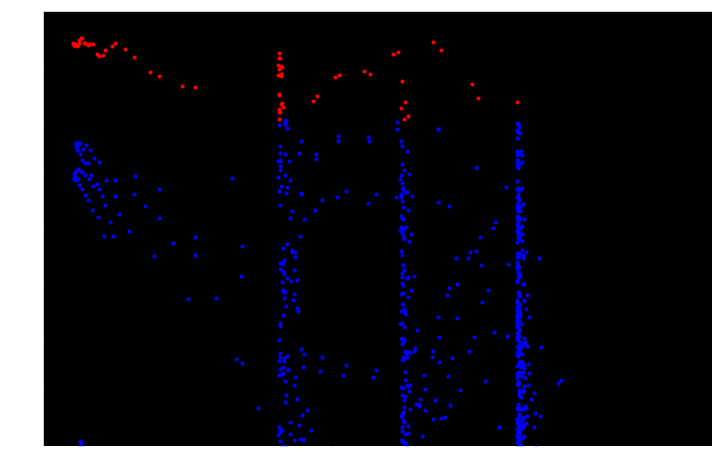

In [11]:
inds = res['best_matches'] > 0.95
not_inds = np.logical_not(inds)
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.log10(res['best_diams'][inds]), res['best_matches'][inds], '.r')
ax.plot(np.log10(res['best_diams'][not_inds]), res['best_matches'][not_inds], '.b')
ax.set_ylim([0.8,1])

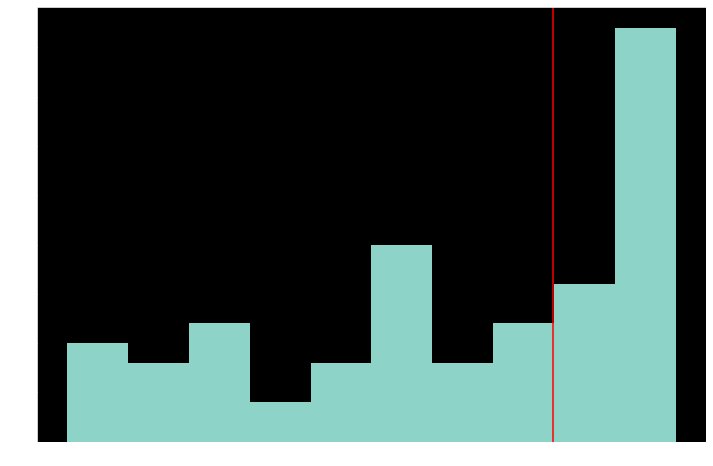

In [12]:
fig, ax = plt.subplots(figsize=(12,8))
ax.hist(res['best_matches'][res['best_matches'] > 0.95])
ax.axvline(0.98, color='r')

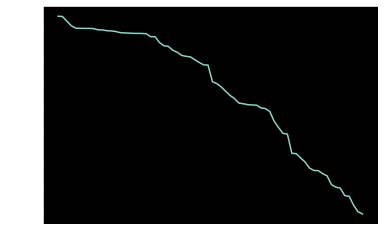

In [13]:
plt.plot(res['best_matches'][res['best_matches'] > 0.95])

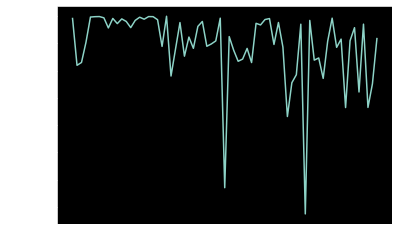

In [14]:
plt.plot(np.diff(res['best_matches'][res['best_matches'] > 0.95]))

In [15]:
diams = res['best_diams'][res['best_matches'] > 0.98]

In [16]:
diams

array([0.03655748, 0.03704866, 0.0359097 , 2.97439192, 0.03561886,
       0.03863809, 0.03808539, 0.03327058, 0.05568107, 0.03332784,
       0.03389246, 0.04035748, 0.04264669, 0.04176449, 0.03378445,
       0.03358995, 0.03422224, 0.03349164, 0.03444058, 0.03974601,
       0.03511154, 0.03487414, 0.05368949, 0.06308381, 0.0494354 ,
       3.26460971, 1.92683779, 0.43459037, 0.04467903])

In [17]:
print(np.mean(diams), np.std(diams))


0.3308060991508167 0.8361170057028735


In [18]:
len(diams) / len(res['best_diams'])

0.0029

In [19]:
sum_file = '/home/danielk/git/antisat_analysis/projects/output/russian_asat/2021.11.23_uhf_rcs/collected_results.pickle'
with open(sum_file, 'rb') as fh:
    summary_data = pickle.load(fh)

In [20]:
df = pd.DataFrame(summary_data)

In [21]:
df

,measurnment_id,event_name,correlated,object_id,norad_id,SNR,range,doppler,estimated_offset_angle,estimated_diam,...,estimated_gain,proxy_d_inc,proxy_d_anom,predicted_offset_angle,predicted_diam,predicted_gain,discos_diam,discos_avg_diam,discos_min_diam,discos_max_diam
0,NaN,uhf_20211123_124611_800000,False,NaN,NaN,112769.699344,396176000.0,624402.0,0.302202,0.054385,...,45.799630,0.000281,-0.000102,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,uhf_20211123_124331_400000,False,NaN,NaN,15456.705625,483865000.0,693343.0,0.254209,0.042209,...,46.523134,-0.000362,0.000102,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,uhf_20211123_125021_000000,False,NaN,NaN,35240.675625,704812000.0,973043.0,0.427052,0.155181,...,42.980938,-0.000764,-0.000102,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,uhf_20211123_123828_600000,False,NaN,NaN,3356.464225,632562000.0,846981.0,0.431453,0.051986,...,42.820179,0.000683,-0.000102,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,uhf_20211123_121645_400000,False,NaN,NaN,121.440400,601084000.0,805617.0,1.319840,0.737887,...,22.513252,0.002050,0.000102,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,NaN,uhf_20211123_123921_000000,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
184,NaN,uhf_20211123_124409_800000,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
185,NaN,uhf_20211123_125354_200000,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
186,NaN,uhf_20211123_123928_200000,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(array([55., 19., 31., 16.,  0.,  7.,  0.,  0., 16.,  3.]),
 array([0.03492366, 0.45060581, 0.86628796, 1.28197011, 1.69765226,
        2.11333442, 2.52901657, 2.94469872, 3.36038087, 3.77606302,
        4.19174517]),
 <BarContainer object of 10 artists>)

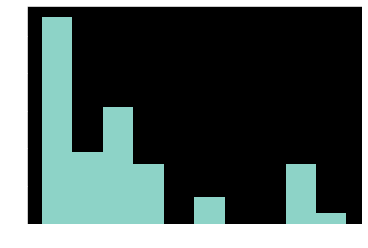

In [22]:
plt.hist(df['estimated_offset_angle'])

In [23]:
def log_hist(x):
    logbins = np.logspace(np.log10(x.min()),np.log10(x.max()),int(np.sqrt(len(x))))
    plt.hist(x, bins=logbins)
    plt.xscale('log')

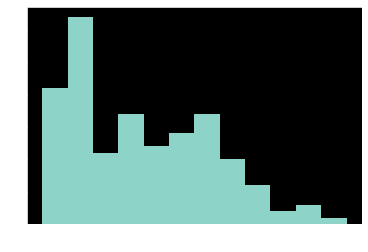

In [24]:
log_hist(df['estimated_diam']*1e2)
#plt.hist(np.log10(df['estimated_diam']*1e2))

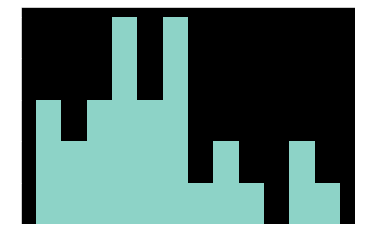

In [29]:
log_hist(df['predicted_diam']*1e2)
#plt.hist(np.log10(df['predicted_diam']*1e2))

In [71]:
df['predicted_offset_angle'].values[np.logical_not(np.isnan(df['predicted_offset_angle']))]

array([ 0.81758683,  0.36412682,  0.96661061,  0.13909412,  0.85197094,
        0.91080493, 43.18260843,  0.33295699,  1.26167687,  0.46189133,
        0.37402346,  0.81458445,  0.08729576,  2.38569021,  0.16392385,
        2.19036962,  3.71200282,  0.48219445,  1.70165762,  1.04772644,
        0.58510396,  0.16733839,  0.11148473, 19.75075048, 63.03593592,
        0.30587089,  1.54826131,  2.59998639,  0.33607954,  0.57657839,
        3.95502935])

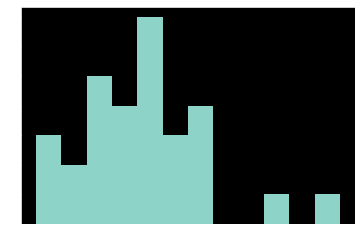

In [42]:
log_hist(df['predicted_offset_angle'])

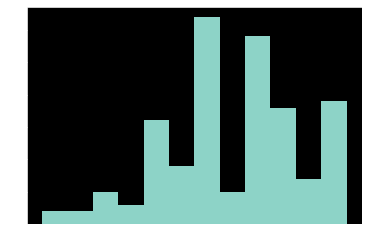

In [43]:
log_hist(df['estimated_offset_angle'])

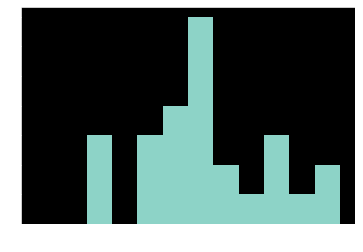

In [31]:
log_hist(np.abs(df['estimated_diam'] - df['predicted_diam'])*1e2)
#plt.hist((df['estimated_diam'] - df['predicted_diam'])*1e2)

In [39]:
discos_d_diff = df['estimated_diam'] - df['discos_avg_diam']
discos_est_inds = np.argwhere(np.logical_not(np.isnan(discos_d_diff.values))).flatten()
for ind in discos_est_inds:
    print(f'\nIND={ind}')
    print('Discos:')
    print(
        df['discos_min_diam'].values[ind]*1e2,
        df['discos_avg_diam'].values[ind]*1e2,
        df['discos_max_diam'].values[ind]*1e2,
    )
    print('Predicted:')
    print(
        df['predicted_diam'].values[ind]*1e2,
    )
    print('Estimated:')
    print(
        df['estimated_min_diam'].values[ind]*1e2,
        df['estimated_diam'].values[ind]*1e2,
        df['estimated_max_diam'].values[ind]*1e2,
    )


IND=35
Discos:
15.957691216057308 17.983404693292407 19.99492978349364
Estimated:
nan 36.4497551183117 nan
Predicted:
18.407490266694964

IND=104
Discos:
15.957691216057308 17.989074399478675 19.99999999999999
Estimated:
nan 77.74894365361136 nan
Predicted:
nan
